In [1]:
# Basic
import numpy as np 
import pandas as pd 

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Scaling
from sklearn.preprocessing import StandardScaler

# train test split
from sklearn.model_selection import train_test_split

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

# Cross validation
from sklearn.model_selection import cross_val_score

## EDA

In [2]:
dataset = pd.read_csv('/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv', index_col = False)

dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
# Checking for missing values

dataset.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

**There is no salary for 67 students. These many students were not placed yet.**

In [4]:
dataset.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


**Let's find out the specifics in categorical variables in relation to the placement status of the student.**

In [6]:
cols = dataset.select_dtypes(include=['object']).columns

for col in cols:
    print('----'+str(col).upper()+'----')
    print(pd.crosstab(index = dataset[col], columns = dataset['status']))
    print()


----GENDER----
status  Not Placed  Placed
gender                    
F               28      48
M               39     100

----SSC_B----
status   Not Placed  Placed
ssc_b                      
Central          38      78
Others           29      70

----HSC_B----
status   Not Placed  Placed
hsc_b                      
Central          27      57
Others           40      91

----HSC_S----
status    Not Placed  Placed
hsc_s                       
Arts               5       6
Commerce          34      79
Science           28      63

----DEGREE_T----
status     Not Placed  Placed
degree_t                     
Comm&Mgmt          43     102
Others              6       5
Sci&Tech           18      41

----WORKEX----
status  Not Placed  Placed
workex                    
No              57      84
Yes             10      64

----SPECIALISATION----
status          Not Placed  Placed
specialisation                    
Mkt&Fin                 25      95
Mkt&HR                  42      53

----ST

**We have the unique values of all the categorical variables and can see the distribution of the same with respect to the placement status of the student.**

## One by one exploration of the columns

### 1. Gender

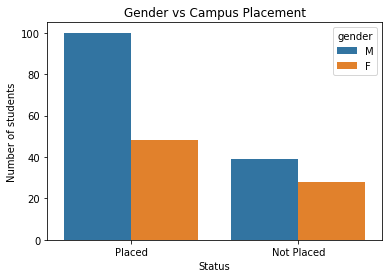

In [7]:
sns.countplot(x = 'status', data = dataset, hue = 'gender')
plt.title('Gender vs Campus Placement')
plt.xlabel('Status')
plt.ylabel('Number of students')
plt.show()

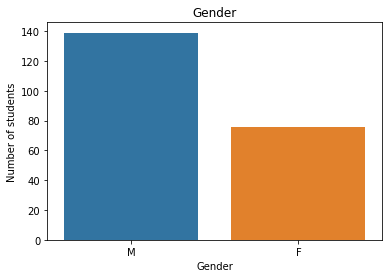

In [8]:
sns.countplot(x='gender', data = dataset)
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Number of students')
plt.show()

OBSERVATION:

1. Number of males are almost double than the number of females.
2. The fraction of placed male are much more than the fraction of females. It is significant that the males are placed more often than the females.

### 2. ssc_p (Senior Secondary Percentage)

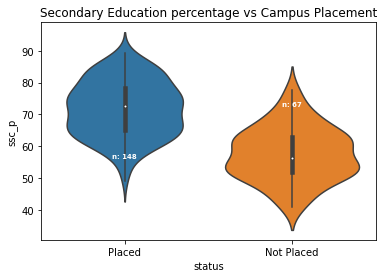

In [9]:
# Secondary percentage vs campus placement
ax = sns.violinplot(x = 'status', y = 'ssc_p', data = dataset)

medians = dataset.groupby(['status'])['ssc_p'].median().values
nobs = dataset['status'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ['n: ' + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick]+0.04, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')

plt.title('Secondary Education percentage vs Campus Placement')
plt.show()

OBSERVATION:

Students with a percentage >60 are more likely to be place and those with <60 are more likely to be unplaced.

### 3. ssc_b (Senior Secondary Board)

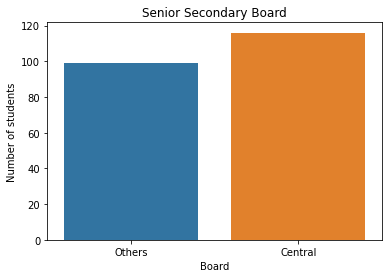

In [10]:
sns.countplot(x='ssc_b', data = dataset)
plt.title('Senior Secondary Board')
plt.xlabel('Board')
plt.ylabel('Number of students')
plt.show()

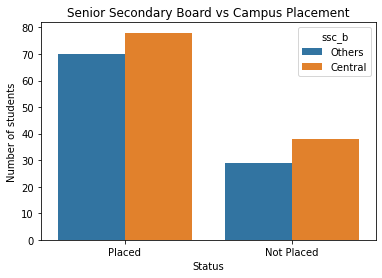

In [11]:
sns.countplot(x = 'status', data = dataset, hue = 'ssc_b')
plt.title('Senior Secondary Board vs Campus Placement')
plt.xlabel('Status')
plt.ylabel('Number of students')
plt.show()

OBSERVATION:

1. The number of students from each Central and Other Boards sitting for placements is very comparable.
2. The status of placement from either board is very comparable. The number do not show any specific preference to a certain Board type

### 4. hsc_p (Higher Secondary Percentage)

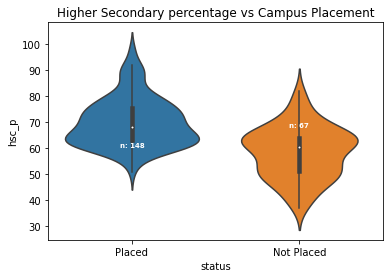

In [12]:
# Highesr Secondary percentage vs campus placement
ax = sns.violinplot(x = 'status', y = 'hsc_p', data = dataset)

medians = dataset.groupby(['status'])['hsc_p'].median().values
nobs = dataset['status'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ['n: ' + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick]+0.04, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')

plt.title('Higher Secondary percentage vs Campus Placement')
plt.show()

OBSERVATION:

Students with a higher HSC percentage are more likely to get placed. Student who scored <60 are most likely to be unplaced.

### 5. hsc_b (Higher Secondary Board)

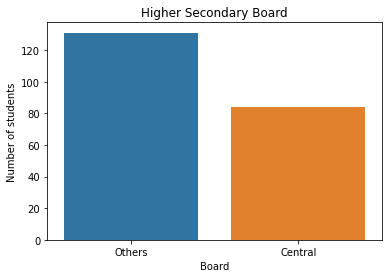

In [13]:
sns.countplot(x='hsc_b', data = dataset)
plt.title('Higher Secondary Board')
plt.xlabel('Board')
plt.ylabel('Number of students')
plt.show()

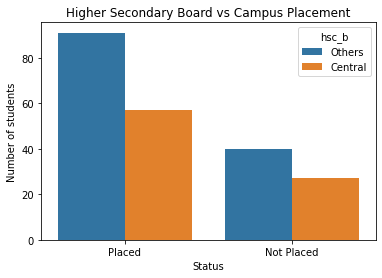

In [14]:
sns.countplot(x = 'status', data = dataset, hue = 'hsc_b')
plt.title('Higher Secondary Board vs Campus Placement')
plt.xlabel('Status')
plt.ylabel('Number of students')
plt.show()

OBSERVATION:

1. There are more students who attended Other boards than Central.
2. The percentage of students placed that belonged to each category is comparable. The numbers do not show a specific inclination towards a particular board category.

### 6. hsc_s (Subject in HSC)

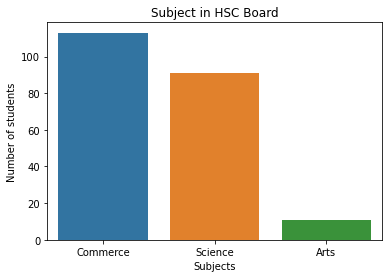

In [15]:
sns.countplot(x='hsc_s', data = dataset)
plt.title('Subject in HSC Board')
plt.xlabel('Subjects')
plt.ylabel('Number of students')
plt.show()

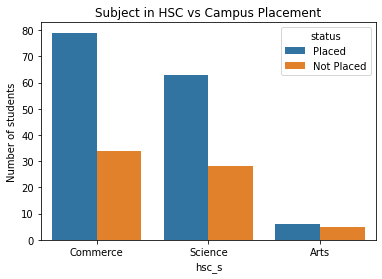

In [16]:
sns.countplot(x = 'hsc_s', data = dataset, hue = 'status')
plt.title('Subject in HSC vs Campus Placement')
plt.xlabel('hsc_s')
plt.ylabel('Number of students')
plt.show()

OBSERVATION:

1. The number of students who opted for the subjects in HSC are in the order: Commerce>Science>Arts
2. Students with Science and Commerce in their HSC are the ones that get preference in placements.

### 7. degree_p (Percentage in Graduation)

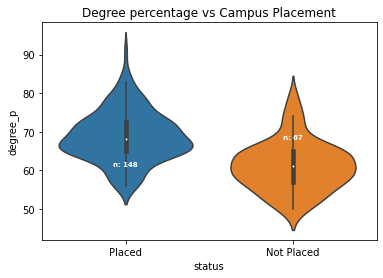

In [17]:
# Degree percentage vs campus placement
ax = sns.violinplot(x = 'status', y = 'degree_p', data = dataset)

medians = dataset.groupby(['status'])['degree_p'].median().values
nobs = dataset['status'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ['n: ' + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick]+0.04, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')

plt.title('Degree percentage vs Campus Placement')
plt.show()

OBSERVATION:

Students with a higher score in graduation are more likely to be placed. Students with scores <60 are much more likely to be un-placed.

### 8. degree_t (Graduation level)

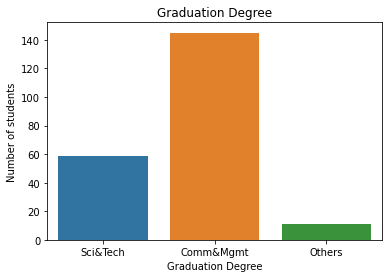

In [18]:
sns.countplot(x='degree_t', data = dataset)
plt.title('Graduation Degree')
plt.xlabel('Graduation Degree')
plt.ylabel('Number of students')
plt.show()

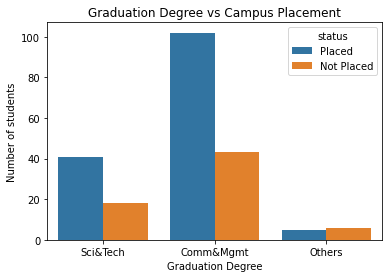

In [19]:
sns.countplot(x = 'degree_t', data = dataset, hue = 'status')
plt.title('Graduation Degree vs Campus Placement')
plt.xlabel('Graduation Degree')
plt.ylabel('Number of students')
plt.show()

OBSEVRATION:

1. Majority of the students sitting for placements had opted for Commerce&Mgmt, followed by Science and then Others in their graduation degree.
2. Majority of the students getting placed had opted for Commerce&Mgmt, followed by Science and then Others in their graduation degree.

### 9. workex (Work Experience)

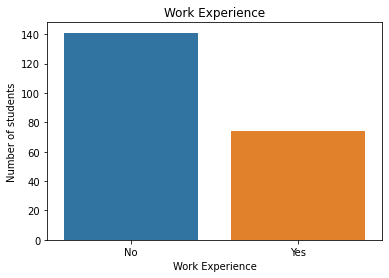

In [20]:
sns.countplot(x='workex', data = dataset)
plt.title('Work Experience')
plt.xlabel('Work Experience')
plt.ylabel('Number of students')
plt.show()

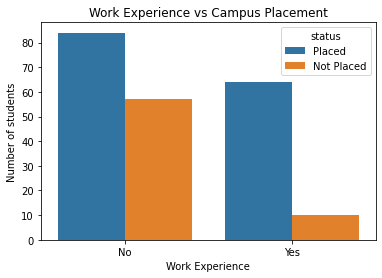

In [21]:
# Work experience vs candidate placement
sns.countplot(x = 'workex', data = dataset, hue = 'status')
plt.title('Work Experience vs Campus Placement')
plt.xlabel('Work Experience')
plt.ylabel('Number of students')
plt.show()

OBSERVATION:

1. Number of students with no experience were almost double than the ones with some work experience.
2. The percentage of students with or without work experience varies a lot when it comes to getting placed. The students with a work experience have a higher chance of getting placed.

### 10. etest_p (Employability test score)

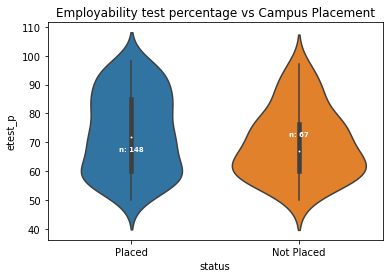

In [22]:
# Employability test percentage vs campus placement
ax = sns.violinplot(x = 'status', y = 'etest_p', data = dataset)

medians = dataset.groupby(['status'])['etest_p'].median().values
nobs = dataset['status'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ['n: ' + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick]+0.04, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')

plt.title('Employability test percentage vs Campus Placement')
plt.show()

OBSERVATION:

There is no particular relation between getting a good employability score and getting placed. However, we can see a slight dependence between the two with students who scored >80 on the test. 

We can also see that there is a decent number of students who scored <65 that are not placed yet.

### 11. specialisation (MBA Specialisation)

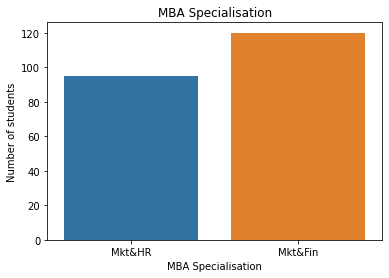

In [23]:
sns.countplot(x='specialisation', data = dataset)
plt.title('MBA Specialisation')
plt.xlabel('MBA Specialisation')
plt.ylabel('Number of students')
plt.show()

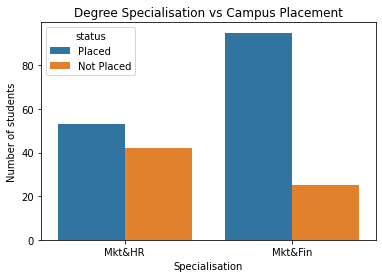

In [24]:
# Degree specialization vs candidate placement
sns.countplot(x = 'specialisation', data = dataset, hue = 'status')
plt.title('Degree Specialisation vs Campus Placement')
plt.xlabel('Specialisation')
plt.ylabel('Number of students')
plt.show()

OBSERVATION:

1. Students opted for Mkt&Fin more than Mkt&HR in MBA.
2. Students who pursued Mkt&Fin were more likely to get placed than students who pursued Mkt&HR.

### 12. mba_p (MBA percentage)

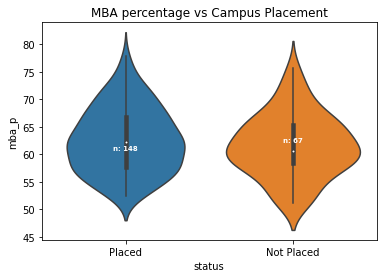

In [25]:
# MBA percentage vs campus placement
ax = sns.violinplot(x = 'status', y = 'mba_p', data = dataset)

medians = dataset.groupby(['status'])['mba_p'].median().values
nobs = dataset['status'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ['n: ' + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick]+0.04, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')

plt.title('MBA percentage vs Campus Placement')
plt.show()

OBSERVATION:

The percentage scored in MBA does not particularly reflect getting placed. There is a slight dependence with people scoring above 65% in terms of getting placed. 

However, we can also see that there is a decent number of placed students who got a percentage <60% in MBA.

## Preprocessing


In [26]:
# Dropping the serial number column
dataset.drop('sl_no', axis=1, inplace = True)
dataset.head(3)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0


**Dropping ssc_b and hsc_b as it does not have much effect of the status of the student**

In [27]:
# Dropping ssc_b and hsc_b
dataset.drop('ssc_b', axis=1, inplace = True)
dataset.drop('hsc_b', axis=1, inplace = True)

print(dataset.shape)
dataset.head(3)


(215, 12)


,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0


**Changing categorical variables into dummy variables**

In [28]:
# Gender: F coded as 0 and M as 1
dummy_variable_1 = pd.get_dummies(dataset['gender'])
dummy_variable_1.rename(columns={'M':'Gender'}, inplace=True)

# drop original column 
dataset.drop("gender", axis = 1, inplace=True)

# merge data frame "dataset" and "dummy_variable_1: Gender column" 
df = pd.concat([dummy_variable_1['Gender'], dataset], axis=1)

df.head(1)

,Gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.0,91.0,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.8,Placed,270000.0


In [29]:
# Higher Secondary Specialisation: Science: 10 and Commerce: 01 and Arts: 00
dummy = pd.get_dummies(df['hsc_s'])
dummy.rename(columns={'Science': 'HS_Sci', 'Commerce': 'HS_Comm'}, inplace=True)
dummy = pd.concat([dummy['HS_Sci'], dummy['HS_Comm']], axis=1)
dummy.head()

# drop original
df.drop('hsc_s', axis=1, inplace=True)

# merge data
df = pd.concat([df.iloc[:, 0:3], dummy, df.iloc[:, 3:]], axis=1)

df.head(1)

,Gender,ssc_p,hsc_p,HS_Sci,HS_Comm,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.0,91.0,0,1,58.0,Sci&Tech,No,55.0,Mkt&HR,58.8,Placed,270000.0


In [30]:
# Undergrad specialisation: Sci&Tech: 10 and Comm&Mgmt: 01 and Others: 00
dummy = pd.get_dummies(df['degree_t'])
dummy.rename(columns={'Sci&Tech': 'UG_Sci', 'Comm&Mgmt': 'UG_Comm'}, inplace=True)
dummy = pd.concat([dummy['UG_Sci'], dummy['UG_Comm']], axis=1)
dummy.head()

# drop original
df.drop('degree_t', axis=1, inplace=True)

# merge data
df = pd.concat([df.iloc[:, 0:6], dummy, df.iloc[:, 6:]], axis=1)

df.head()

,Gender,ssc_p,hsc_p,HS_Sci,HS_Comm,degree_p,UG_Sci,UG_Comm,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,0,1,58.00,1,0,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,1,79.33,78.33,1,0,77.48,1,0,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,1,65.00,68.00,0,0,64.00,0,1,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,1,56.00,52.00,1,0,52.00,1,0,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,1,85.80,73.60,0,1,73.30,0,1,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [31]:
# Work experience: Yes as 1 nd No as 0
dummy = pd.get_dummies(df['workex'])
dummy.rename(columns={'Yes': 'workex'}, inplace=True)
# dummy.head()

# drop original
df.drop('workex', axis=1, inplace=True)

# merge data
df = pd.concat([df.iloc[:, 0:8], dummy['workex'], df.iloc[:, 8:]], axis=1)

df.head(1)

,Gender,ssc_p,hsc_p,HS_Sci,HS_Comm,degree_p,UG_Sci,UG_Comm,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.0,91.0,0,1,58.0,1,0,0,55.0,Mkt&HR,58.8,Placed,270000.0


In [32]:
# Specialisation: Mkt&Fin as 1 and Mkt&HR as 0
dummy = pd.get_dummies(df['specialisation'])
dummy.rename(columns={'Mkt&Fin': 'specialisation'}, inplace=True)
# dummy.head()

# drop original data
df.drop('specialisation', axis=1, inplace=True)

# merge data
df= pd.concat([df.iloc[:, 0:10], dummy['specialisation'], df.iloc[:, 10:]], axis=1)

df.head(2)

,Gender,ssc_p,hsc_p,HS_Sci,HS_Comm,degree_p,UG_Sci,UG_Comm,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,0,1,58.00,1,0,0,55.0,0,58.80,Placed,270000.0
1,1,79.33,78.33,1,0,77.48,1,0,1,86.5,1,66.28,Placed,200000.0


In [33]:
# Change Placed into dummy variables: Placed as 1 and Not Placed as 0
dummy = pd.get_dummies(df['status'])
dummy.rename(columns={'Placed': 'status'}, inplace=True)
# dummy.head()

# drop original
df.drop('status', axis=1, inplace=True)

# merge data
df = pd.concat([df.iloc[:, 0:12], dummy['status'], df.iloc[:, 12:]], axis=1)

df.head()

,Gender,ssc_p,hsc_p,HS_Sci,HS_Comm,degree_p,UG_Sci,UG_Comm,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,0,1,58.00,1,0,0,55.0,0,58.80,1,270000.0
1,1,79.33,78.33,1,0,77.48,1,0,1,86.5,1,66.28,1,200000.0
2,1,65.00,68.00,0,0,64.00,0,1,0,75.0,1,57.80,1,250000.0
3,1,56.00,52.00,1,0,52.00,1,0,0,66.0,0,59.43,0,NaN
4,1,85.80,73.60,0,1,73.30,0,1,0,96.8,1,55.50,1,425000.0


## Model Construction

**We will not take in the salary to predict whether the student is placed or not.**

In [34]:
# spliting the dataset to get the independent and dependent variables separately
X = df.iloc[:, :-2].values
y = df.iloc[:, -2].values

print('X_shape {}'.format(X.shape))
print('y_shape {}'.format(y.shape))

X_shape (215, 12)
y_shape (215,)


In [35]:
# Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('Shape of training set: {} and test set: {}'.format(X_train.shape, X_test.shape))

Shape of training set: (150, 12) and test set: (65, 12)


In [36]:
# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

print('Scaled Successfully')

Scaled Successfully


LogisticRegression
Accuracy Score: 0.8461538461538461
Jaccard Score: 0.8076923076923077
F1 Score: 0.8936170212765957
Log Loss: 5.313731715902892


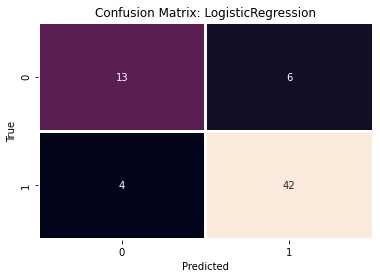

KNeighborsClassifier
Accuracy Score: 0.8
Jaccard Score: 0.7636363636363637
F1 Score: 0.865979381443299
Log Loss: 6.9078659924724715


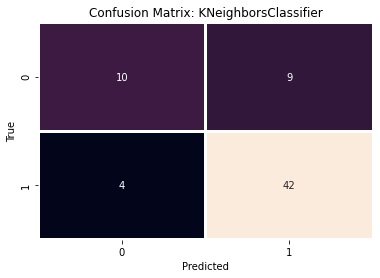

SVC
Accuracy Score: 0.8307692307692308
Jaccard Score: 0.7884615384615384
F1 Score: 0.8817204301075269
Log Loss: 5.8450975065938255


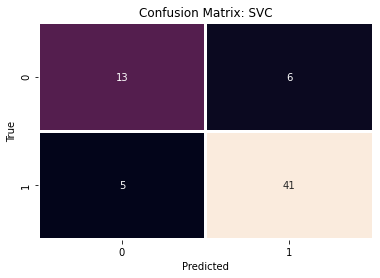

SVC
Accuracy Score: 0.8307692307692308
Jaccard Score: 0.7884615384615384
F1 Score: 0.8817204301075269
Log Loss: 5.8450975065938255


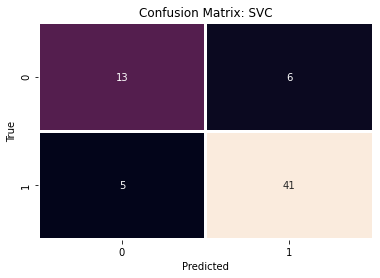

DecisionTreeClassifier
Accuracy Score: 0.6923076923076923
Jaccard Score: 0.6296296296296297
F1 Score: 0.7727272727272727
Log Loss: 10.62741422581008


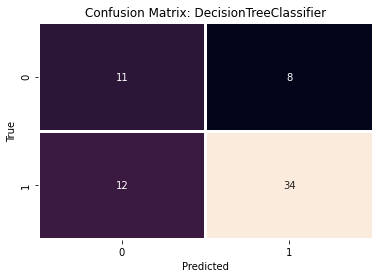

RandomForestClassifier
Accuracy Score: 0.7692307692307693
Jaccard Score: 0.7115384615384616
F1 Score: 0.8314606741573034
Log Loss: 7.970560669357561


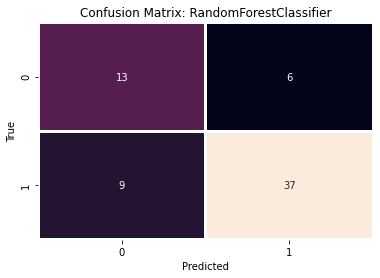

In [37]:
classifiers = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2), SVC(kernel = 'linear'), SVC(kernel = 'rbf'), DecisionTreeClassifier(criterion='entropy'), RandomForestClassifier(n_estimators = 10, criterion = 'entropy')]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # print classifier name
    print(str(type(classifier)).split('.')[-1][:-2])
    
    # Accuracy Score
    print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
    
    # jaccard Score
    print('Jaccard Score: {}'.format(jaccard_score(y_test, y_pred)))
    
    # F1 score
    print('F1 Score: {}'.format(f1_score(y_test, y_pred)))
    
    # Log Loss
    print('Log Loss: {}'.format(log_loss(y_test, y_pred)))
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, lw = 2, cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix: {}'.format(str(type(classifier)).split('.')[-1][:-2]))
    plt.show()

**NOTE: There are two SVC models that are printed above.**

**The first one if a linear kernel SVC and the second one is a Gaussian Kernel SVC.**

**The models tested: Logistic Regression, k-NN, SVC, Kernel SVC, Decision Tree, and Random Forest.**

**The Logistic Regression and SVC models gave a better result than the other models:**

**1. Higher F1 score**

**2. Lower LogLoss**

**3. Higher Accuracy Score**

**4. Higher Jaccard Score**

**We will select the LOGISTIC REGRESSION Model as the performance of that model is better than SVC.**

### Feature Selection

Applying **SelectKBest** to select the number of features that give the best result (that are most relevant to quesiton being asked.

In [38]:
X = df.iloc[:, :-2].values
y = df.iloc[:, -2].values

# Finding out the significance of each feature in the dataset 
kb = SelectKBest(chi2, k = 'all')
X_new = kb.fit_transform(X, y)

print(kb.pvalues_)

[4.29267229e-01 8.31024074e-32 6.90714091e-22 9.35394953e-01
 8.05244192e-01 2.28674465e-10 9.13588361e-01 6.95085203e-01
 1.04534116e-03 3.50747834e-03 1.45623629e-02 4.05533534e-01]


We have 12 features in our model. Above, are the p values for all the features in our model.

A **parameter sweep for the K best features** will give us the optimum number of features required for an optimum level of accuracy, jaccard score, logloss and f1 score.

In [39]:
X = df.iloc[:, :-2].values
y = df.iloc[:, -2].values

acc=[]
logloss=[]
f1=[]
jaccard=[]

for k in range(1, 13):
    
    # Selecting features
    kb = SelectKBest(chi2, k = k)
    X_new = kb.fit_transform(X, y)
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    
    #classifier
    classifier = LogisticRegression(random_state=0)
    
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    acc.append(accuracy_score(y_test, y_pred))
    jaccard.append(jaccard_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    logloss.append(log_loss(y_test,y_pred))
    

    

Text(0.5, 1.0, 'Log Loss Score: LR')

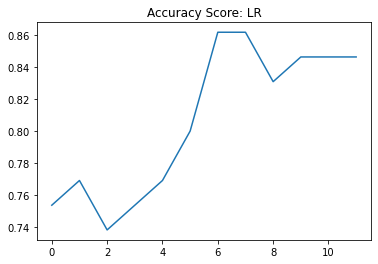

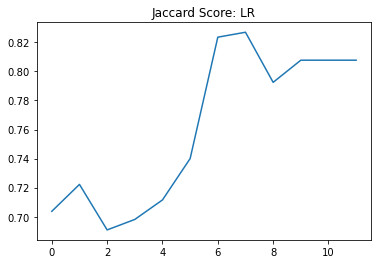

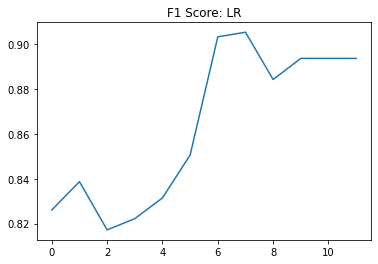

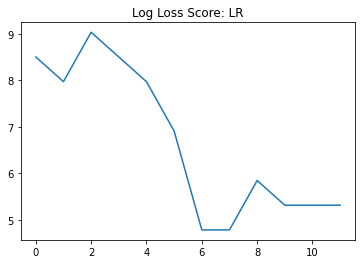

In [40]:
plt.figure()
plt.plot(acc)
plt.title('Accuracy Score: LR')

plt.figure()
plt.plot(jaccard)
plt.title('Jaccard Score: LR')

plt.figure()
plt.plot(f1)
plt.title('F1 Score: LR')

plt.figure()
plt.plot(logloss)
plt.title('Log Loss Score: LR')

**The Logistic Regression model gives the optimum result when it takes in 6 or 7 features to train the model. The performance drops when features are >7 and <6.**


**We will select the 6 best features to finalise our LOGISTIC REGRESSION model.**

In [41]:
X = df.iloc[:, :-2].values
y = df.iloc[:, -2].values

# Selecting 7 best features
kb = SelectKBest(chi2, k = 6)
X_new = kb.fit_transform(X, y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

# Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
    
#classifier
classifier = LogisticRegression(random_state=0)
    
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
    
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
print('Jaccard Score: {}'.format(jaccard_score(y_test, y_pred)))
print('F1 Score: {}'.format(f1_score(y_test, y_pred)))
print('Log Loss: {}'.format(log_loss(y_test,y_pred)))

Accuracy Score: 0.8
Jaccard Score: 0.74
F1 Score: 0.8505747126436782
Log Loss: 6.907804484977841


### Cross Validation

In [42]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies

array([1.        , 0.86666667, 0.86666667, 0.8       , 0.86666667,
       1.        , 1.        , 0.8       , 0.8       , 0.8       ])

In [43]:
print('Evaluation of our model performance: {}'.format(accuracies.mean()))
print('Variance check: {}'.format(accuracies.std()))

Evaluation of our model performance: 0.8800000000000001
Variance check: 0.0832666399786453


**The model will most of the time give an accuracy in the range: (88 - 8)% to (88 + 6)%, that is, 80% to 94%.**